In [1]:
import warnings
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score

pd.set_option('precision', 20)
warnings.simplefilter('ignore')

In [2]:
dt = pd.read_csv('./word2vec.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.01359482482075691223,-0.06877159327268600464,-0.01312609389424324036,0.00602444121614098636,0.03792188689112663269,-0.02087241783738135945,-0.01032459363341331482,0.00801859516650438309,0.00806378014385700226,0.01138116978108882904,...,-0.02096499875187873493,0.06247289106249808571,-0.00005988528209854849,-0.06262146681547163529,-0.01958637684583663940,0.04600673168897628784,0.00381099176593124823,0.01113303098827600306,-0.04020838066935539246,-0.04196779057383536599
1,0.02500919811427593231,-0.02558607049286365162,0.01223747152835130692,0.02056710422039032329,0.01452295947819948196,-0.01870472356677055706,-0.05839468538761138916,0.02805390954017639160,-0.03236185014247894287,0.02058210223913192749,...,-0.03497672453522682190,0.03047488443553448070,0.03889907523989676735,0.01692577451467513691,-0.00066598755074664950,0.00731092086061835289,0.00134810432791709900,0.00841433275490999222,-0.01392686367034912109,0.00239939475432038307
2,0.03154385834932326577,-0.02588219568133354187,-0.06061670556664464776,0.03599164262413977883,0.03774229437112807534,-0.02113202027976512562,-0.04102319851517675919,0.01107627153396606445,0.00324714253656566143,0.01442667003720998764,...,-0.00014593750529456884,0.00029255746630951757,0.02933352254331111214,-0.00573470350354909810,-0.02568292990326881409,0.02869392745196819305,0.02869183383882045746,0.04904300719499587319,-0.01124960556626320059,-0.02942314930260181080
3,0.05871402099728583596,-0.08025125414133071899,-0.02610099874436856010,0.06046065688133241134,0.01671449467539787292,-0.00520526710897684097,-0.03744075819849967957,0.05147174745798110962,-0.06350474059581757980,0.00324714789167046504,...,-0.02187935262918471943,0.01710331067442893982,0.01647211983799934387,-0.00495306123048067180,-0.00152060878463089466,-0.01882163062691688538,0.02021571062505244515,0.02570796944200992237,-0.01654311642050743103,0.01297281403094529932
4,0.02336619794368743896,-0.06566702574491499467,-0.01560061797499656504,0.02260199747979640961,0.03036541491746902466,-0.06059028208255768516,-0.07105538249015808105,-0.00864130258560180664,-0.01872800104320048592,0.04288048297166822953,...,0.01421917043626308788,0.05161334574222565391,0.02731567248702048908,-0.03000600636005401958,-0.02820869348943233143,0.06425588577985763550,-0.01929101720452308655,0.00372498435899615331,-0.04993722960352896950,-0.01597486808896064411


In [3]:
data = normalize(dt.values, norm = 'l2')

Time in Minutes: 20.39193412065506


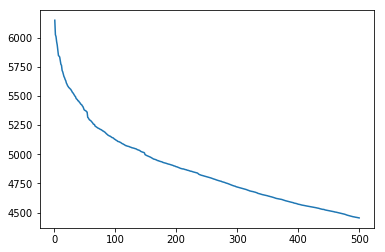

In [4]:
highest_k = 500
init = 'k-means++' # k-means++ / random

start = time.time()

clusters = []

for k in range(highest_k):

    current_k = k + 1
    
    kmeans = KMeans(n_clusters = current_k,
                    n_init = 1,
                    max_iter = 1,
                    init = init,
                    algorithm = 'auto',
                    precompute_distances = 'auto',
                    random_state = 0,
                    verbose = False)
    
    kmeans.fit(data)
    
    loss = kmeans.inertia_
    
    clusters.append([current_k, loss])

clusters = np.array(clusters)

plt.plot(clusters[:, 0], clusters[:, 1])

finish = time.time()

print("Time in Minutes: " + str((finish - start) / 60))